## Event Classification Models

#### Import Packages

In [1]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
from sklearn.model_selection import train_test_split

#### Load Datasets

First we load the images from the label folders:

In [2]:
head_head = io.ImageCollection('../data/Images/head-head/*.jpg')
head_abdomen = io.ImageCollection('../data/Images/head-abdomen/*.jpg')
regular_encounter = io.ImageCollection('../data/Images/regular-encounter/*.jpg')

You can check if everything is alright by inspecting the first element of each image collection:

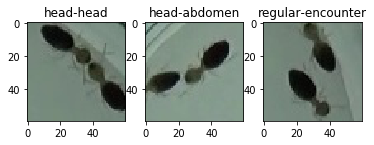

In [3]:
figure, axis = plt.subplots(1,3)

axis[0].imshow(head_head[0])
axis[0].set_title('head-head')
axis[1].imshow(head_abdomen[0])
axis[1].set_title('head-abdomen')
axis[2].imshow(regular_encounter[0])
axis[2].set_title('regular-encounter')

plt.show()

Now let's concatenate the images in a single matrix, our dataset:

In [4]:
dataset = io.ImageCollection.concatenate(np.vstack((head_head, head_abdomen, regular_encounter)))
dataset.shape

(988, 60, 60, 3)

And unroll at image as a single row in the dataset matrix:

In [5]:
dataset = dataset.reshape(dataset.shape[0], -1)
dataset.shape

(988, 10800)

We also must create a target vector, containing the encoded class of each image:

In [6]:
targets = np.zeros((dataset.shape[0], 1))
targets[:len(head_head)] = 0
targets[len(head_head):len(head_head)+len(head_abdomen)] = 1
targets[len(head_head)+len(head_abdomen):] = 2
targets.shape

(988, 1)

Finally we have our examples and targets in separated, indexed arrays:

In [7]:
X, y = dataset, targets

And to later testing purposes we separate a training and test sets, in a 80/20% ratio:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)